In [7]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import numpy as np
from pointpats import centrography
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy import stats
import shapely as shapely
import seaborn as sns

In [2]:
stations_full = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\spatial statistics\indv files\stations_full.geojson")

In [3]:
stations_full

,ID,year,month,element,Date,Amt (mm),Lat,Long,geometry
0,US1COAD0001,2002,1,SNOW,Val1,13.0,39.946,-104.6088,POINT (-10093313.994 4701775.544)
1,US1COAD0001,2002,1,SNOW,Val10,104.0,39.946,-104.6088,POINT (-10093313.994 4701775.544)
2,US1COAD0001,2002,2,SNOW,Val25,38.0,39.946,-104.6088,POINT (-10093313.994 4701775.544)
3,US1COAD0001,2002,2,SNOW,Val26,13.0,39.946,-104.6088,POINT (-10093313.994 4701775.544)
4,US1COAD0001,2002,3,SNOW,Val1,89.0,39.946,-104.6088,POINT (-10093313.994 4701775.544)
...,...,...,...,...,...,...,...,...,...
267821,US1WYWS0029,2020,3,SNOW,Val28,13.0,43.7019,-104.6947,POINT (-10101602.165 5060908.463)
267822,US1WYWS0029,2020,4,SNOW,Val2,64.0,43.7019,-104.6947,POINT (-10101602.165 5060908.463)
267823,US1WYWS0029,2020,4,SNOW,Val12,64.0,43.7019,-104.6947,POINT (-10101602.165 5060908.463)
267824,US1WYWS0030,2018,1,SNOW,Val14,71.0,44.1263,-104.3947,POINT (-10072656.281 5100163.709)


In [10]:
stations_full['Long'] = pd.to_numeric(stations_full['Long'], errors='coerce')
stations_full['Lat'] = pd.to_numeric(stations_full['Lat'], errors='coerce')

In [5]:
print(stations_full.crs)

epsg:6933


tried to do a kde plot but got an error

C:\Users\p7j5p\miniconda3\envs\info615\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Long', ylabel='Lat'>

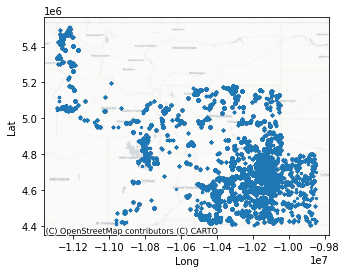

In [11]:
ax = stations_full.plot(markersize=5)
cx.add_basemap(ax, crs=stations_full.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

sns.kdeplot(stations_full['Long'], stations_full['Lat'], bw_adjust=1.5, shade=True, cmap='viridis', alpha=.5, ax=ax)

In [12]:
stations_UTID = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\spatial statistics\indv files\stations_UTID.geojson")
stations_WYCO = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\spatial statistics\indv files\stations_WYCO.geojson")

In [31]:
stations_UTID['month'] = pd.to_numeric(stations_UTID['month'], errors='coerce')
stations_WYCO['month'] = pd.to_numeric(stations_WYCO['month'], errors='coerce')

In [26]:
stations_UTID.dtypes

ID            object
year          object
month          int64
element       object
Date          object
Amt..mm.     float64
Lat           object
Long          object
geometry    geometry
dtype: object

In [32]:
stations_UTID12 = stations_UTID.loc[(stations_UTID['month'] < 3)]
stations_UTID34 = stations_UTID.loc[(stations_UTID['month'] > 2)]
stations_WYCO12 = stations_WYCO.loc[(stations_WYCO['month'] < 3)]
stations_WYCO34 = stations_WYCO.loc[(stations_WYCO['month'] > 2)]

In [30]:
stations_UTID34

,ID,year,month,element,Date,Amt..mm.,Lat,Long,geometry
9,US1IDAD0002,2009,3,SNOW,Val5,18.0,43.6695,-116.2653,POINT (-11218006.319 5057900.273)
10,US1IDAD0002,2009,3,SNOW,Val6,20.0,43.6695,-116.2653,POINT (-11218006.319 5057900.273)
11,US1IDAD0002,2009,3,SNOW,Val9,33.0,43.6695,-116.2653,POINT (-11218006.319 5057900.273)
14,US1IDAD0002,2010,3,SNOW,Val13,33.0,43.6695,-116.2653,POINT (-11218006.319 5057900.273)
21,US1IDAD0002,2011,3,SNOW,Val17,8.0,43.6695,-116.2653,POINT (-11218006.319 5057900.273)
...,...,...,...,...,...,...,...,...,...
19344,US1UTWY0001,2009,3,SNOW,Val10,25.0,38.3943,-111.5911,POINT (-10767010.148 4547487.624)
19345,US1UTWY0001,2009,4,SNOW,Val4,76.0,38.3943,-111.5911,POINT (-10767010.148 4547487.624)
19346,US1UTWY0001,2009,4,SNOW,Val11,25.0,38.3943,-111.5911,POINT (-10767010.148 4547487.624)
19354,US1UTWY0001,2010,3,SNOW,Val7,89.0,38.3943,-111.5911,POINT (-10767010.148 4547487.624)


In [14]:
x = stations_UTID['Amt..mm.'].values
y = stations_WYCO['Amt..mm.'].values

In [16]:
from scipy import stats

In [33]:
stats.normaltest(x)
stats.normaltest(y)

NormaltestResult(statistic=351055.02827256825, pvalue=0.0)

In [19]:
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=2302473793.5, pvalue=5.2604227287230616e-23)

In [34]:
UTID12 = stations_UTID12['Amt..mm.'].values
UTID34 = stations_UTID34['Amt..mm.'].values
WYCO12 = stations_WYCO12['Amt..mm.'].values
WYCO34 = stations_WYCO34['Amt..mm.'].values

In [ ]:
stats.mannwhitneyu(UTID12, WYCO12, alternative='greater')

In [37]:
stats.mannwhitneyu(UTID12, WYCO12, alternative='greater')

MannwhitneyuResult(statistic=992193232.0, pvalue=0.3422076652274443)

fail to reject null

In [36]:
stats.mannwhitneyu(WYCO34, UTID34, alternative='greater')

MannwhitneyuResult(statistic=322724868.5, pvalue=2.4445271794549023e-43)

yayy significant at the highest level, reject null

In [38]:
stats.mannwhitneyu(UTID12, WYCO12)

MannwhitneyuResult(statistic=992193232.0, pvalue=0.6844153304548886)

In [ ]:
stats.mannwhitneyu(UTID34, WYCO34)

MannwhitneyuResult(statistic=259030006.5, pvalue=4.8890543589098045e-43)